# **Disease Prediction**

**Problem Statement:** Predictive Modeling for Disease Diagnosis

**Objective:** The objective of this project is to develop a predictive model that can accurately classify individuals into
diseased or non-diseased categories based on their health attributes. By leveraging machine learning
algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease
diagnosis and prognosis.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading_Dataset
train_df = pd.read_csv("D:\Machine Learning Bootcamp\---Courses & Internships---\Mentorness Internship\Disease Prediction\\Train_data.csv ")
test_df = pd.read_csv("D:\Machine Learning Bootcamp\---Courses & Internships---\Mentorness Internship\Disease Prediction\\test_data.csv")

In [3]:
print("Training Data:")
print(train_df.head())

Training Data:
    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                         

In [4]:
print("Test Data:")
print(test_df.head())

Test Data:
    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                             

#### **Data Preprocessing**

In [5]:
train_df.shape

(2351, 25)

In [6]:
train_df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [8]:
train_df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Glucose,2351.0,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.968460
Cholesterol,2351.0,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.0,0.586190,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.0,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
White Blood Cells,2351.0,0.511086,0.277270,0.010139,0.259467,0.527381,0.743164,0.990786
Red Blood Cells,2351.0,0.506590,0.266565,0.044565,0.263589,0.467431,0.743670,1.000000
Hematocrit,2351.0,0.507152,0.285537,0.011772,0.288132,0.493428,0.753657,0.977520
Mean Corpuscular Volume,2351.0,0.492200,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean Corpuscular Hemoglobin,2351.0,0.484459,0.315618,0.000554,0.207938,0.420723,0.778160,0.963235
Mean Corpuscular Hemoglobin Concentration,2351.0,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586


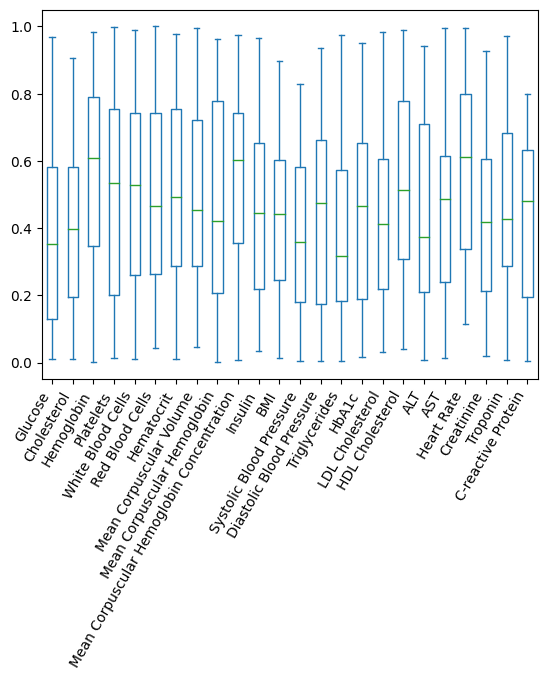

In [10]:
train_df.plot.box()
plt.xticks(rotation=60, ha='right');

No outliers in the train dataset

In [11]:
train_df.isnull()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2349,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
train_df.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [13]:
train_df.isnull().sum()/len(train_df)*100

Glucose                                      0.0
Cholesterol                                  0.0
Hemoglobin                                   0.0
Platelets                                    0.0
White Blood Cells                            0.0
Red Blood Cells                              0.0
Hematocrit                                   0.0
Mean Corpuscular Volume                      0.0
Mean Corpuscular Hemoglobin                  0.0
Mean Corpuscular Hemoglobin Concentration    0.0
Insulin                                      0.0
BMI                                          0.0
Systolic Blood Pressure                      0.0
Diastolic Blood Pressure                     0.0
Triglycerides                                0.0
HbA1c                                        0.0
LDL Cholesterol                              0.0
HDL Cholesterol                              0.0
ALT                                          0.0
AST                                          0.0
Heart Rate          

No Null values available in the train dataset

In [14]:
train_df['Disease'].value_counts(normalize=True)

Disease
Anemia      0.264994
Healthy     0.236495
Diabetes    0.229689
Thalasse    0.216504
Thromboc    0.052318
Name: proportion, dtype: float64

In [15]:
disease_mapping = {'Healthy': 0, 'Anemia': 1, 'Thalasse': 2, 'Diabetes': 3, 'Thromboc': 4}
train_df['Disease'] = train_df['Disease'].map(disease_mapping)
print(disease_mapping)

{'Healthy': 0, 'Anemia': 1, 'Thalasse': 2, 'Diabetes': 3, 'Thromboc': 4}


In [16]:
le = LabelEncoder()
train_df['Disease'] = le.fit_transform(train_df['Disease'])
train_df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,3
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,2
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,2


<Axes: >

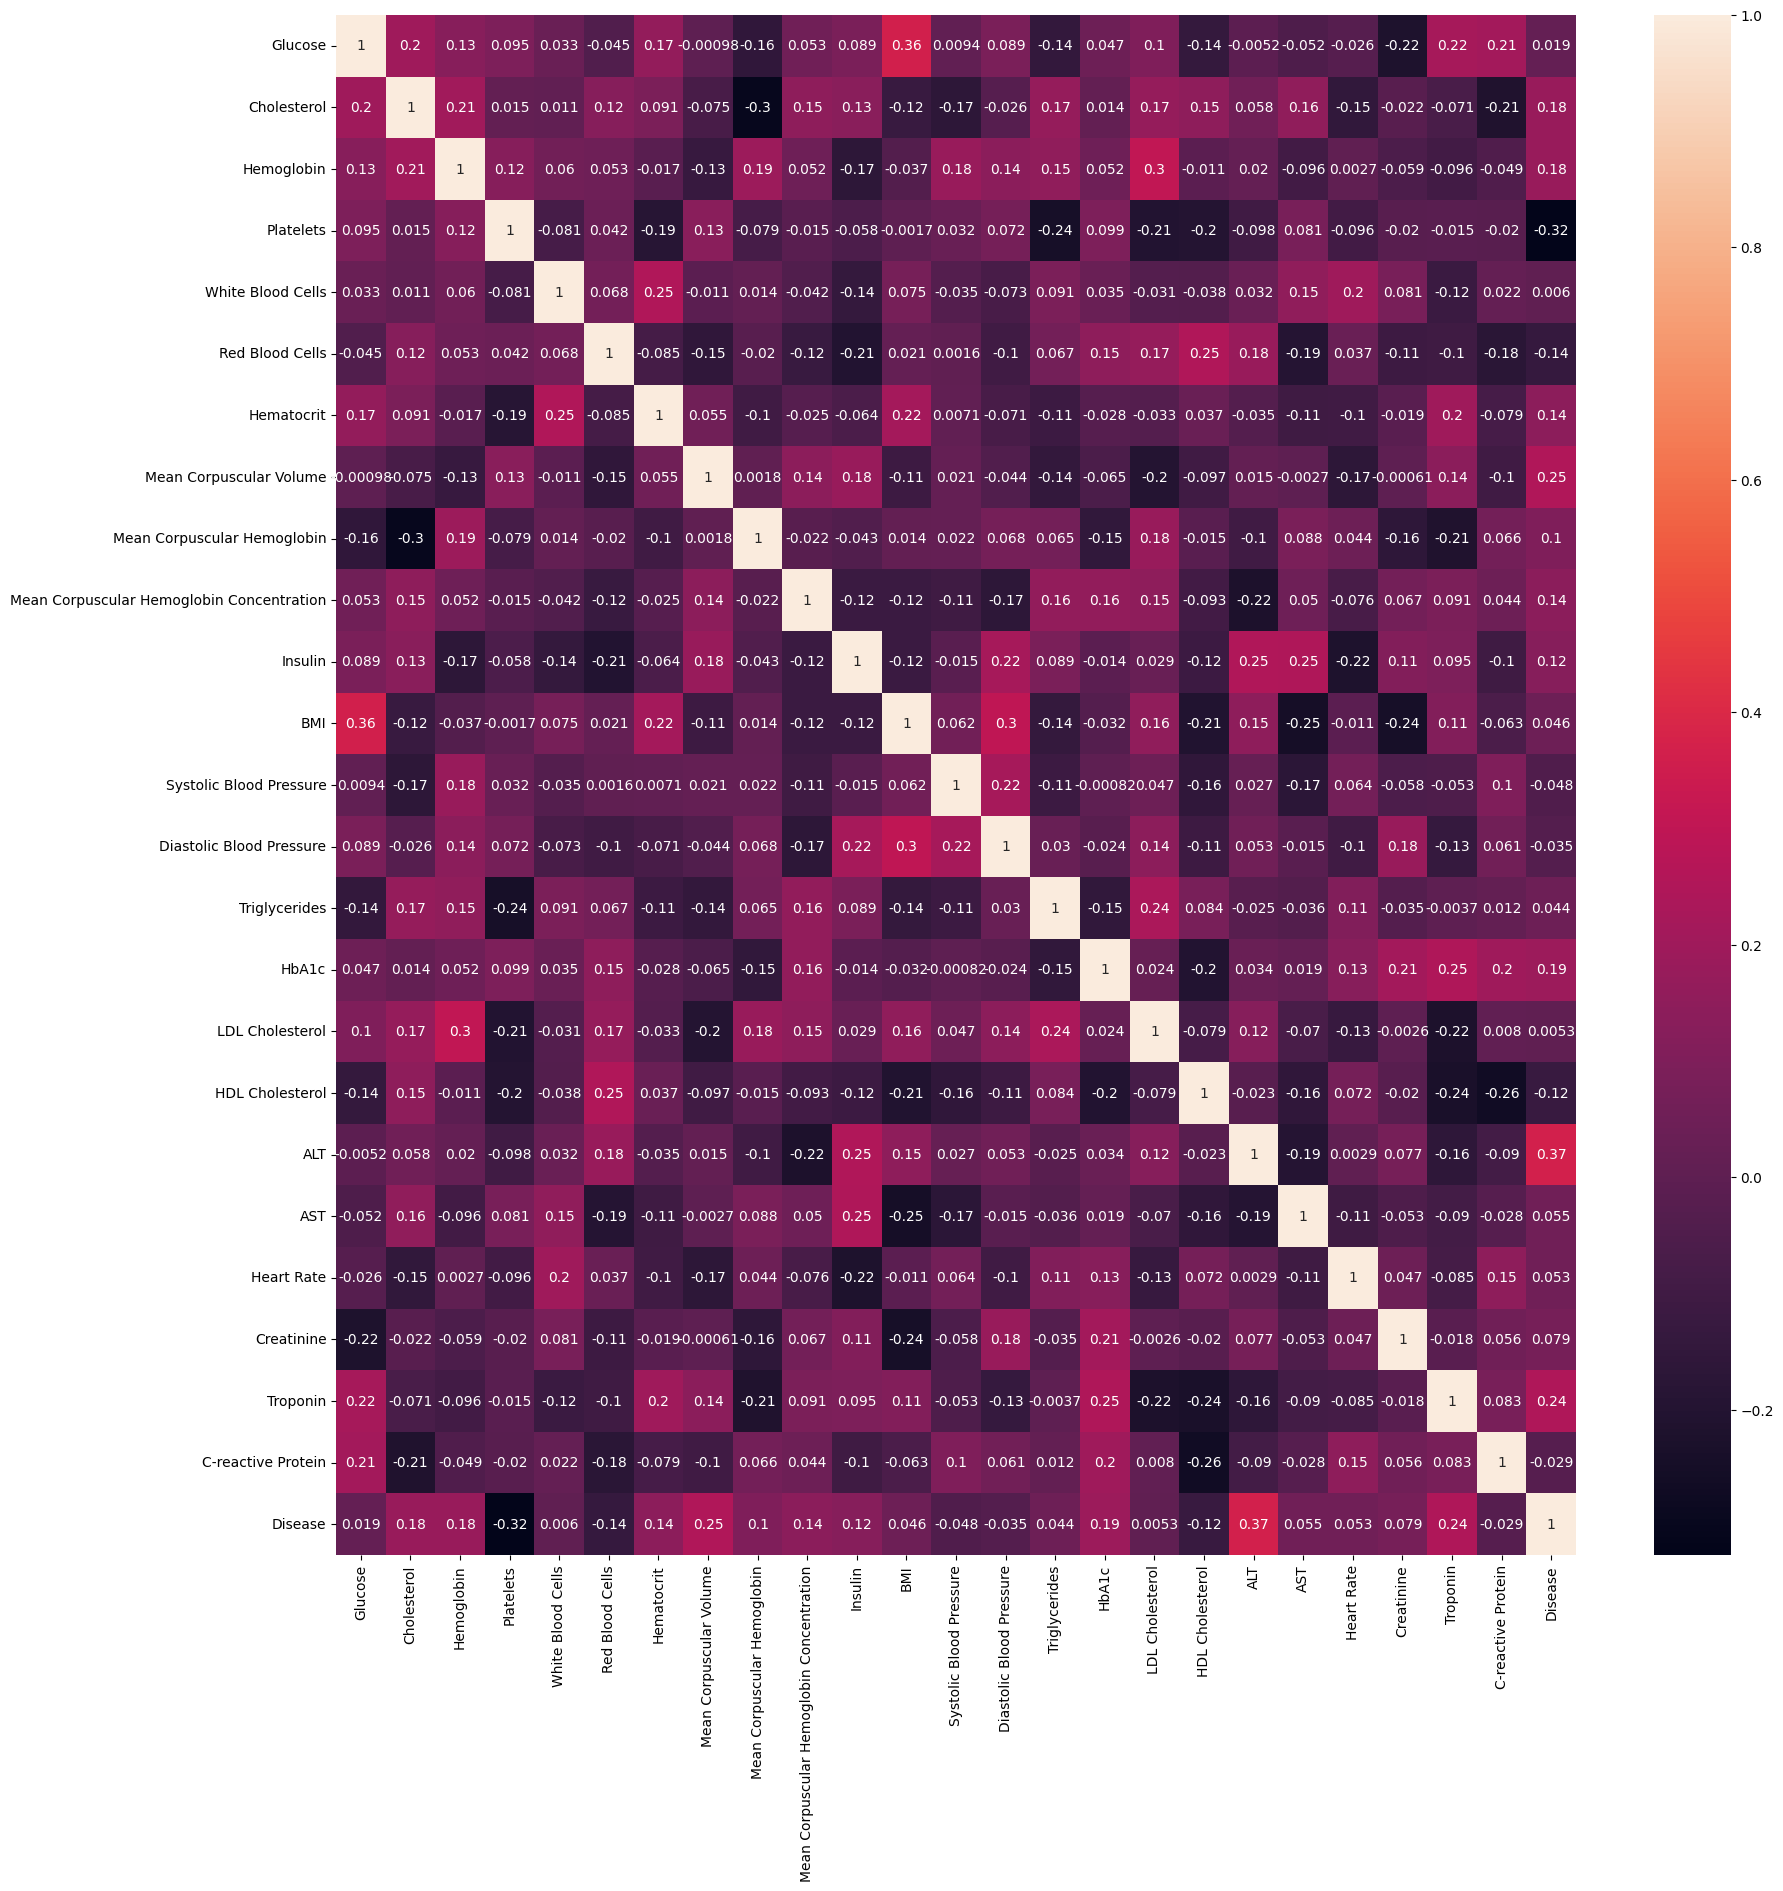

In [17]:
# Explore correlations between features
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_df.corr(), annot=True, ax=ax)

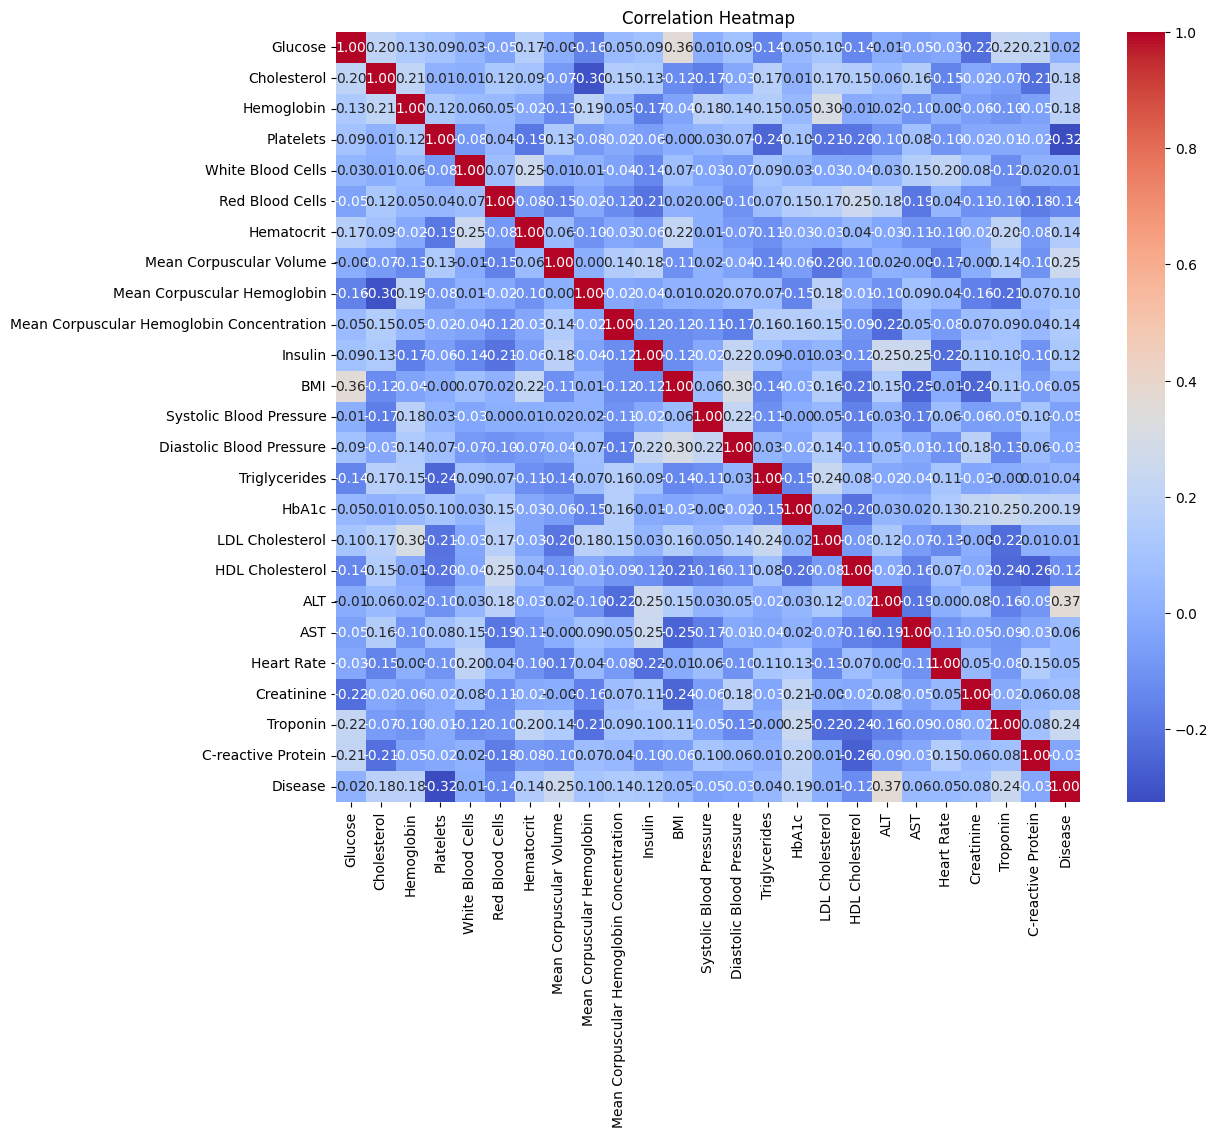

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Glucose', ylabel='Troponin'>

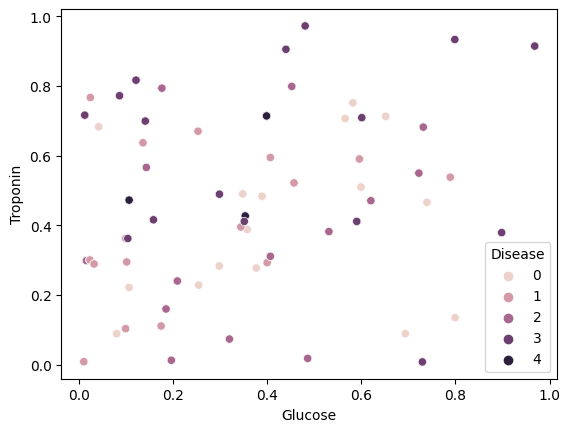

In [19]:
sns.scatterplot(data=train_df, x='Glucose', y='Troponin', hue='Disease')

<Axes: xlabel='Mean Corpuscular Volume', ylabel='Cholesterol'>

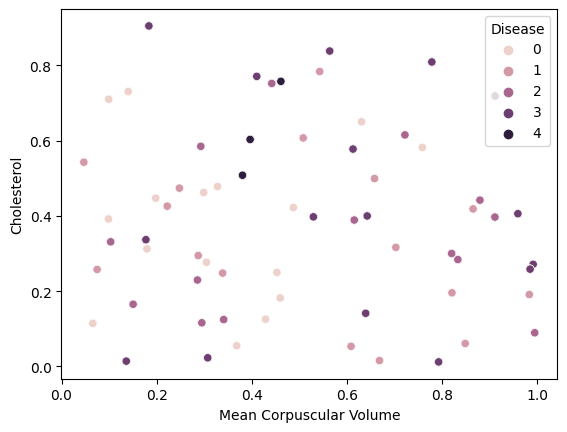

In [20]:
sns.scatterplot(data=train_df, x='Mean Corpuscular Volume', y='Cholesterol', hue='Disease')

In [21]:
#Normalize the dataset and split in atributtes and target
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(train_df.drop(columns='Disease')), index=train_df.drop(columns='Disease').index, columns=train_df.drop(columns='Disease').columns)
X.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.760970,0.714602,0.724901,0.867347,0.690661,0.507968,0.288102,0.615934,0.000804,0.814423,...,0.669366,0.520802,0.191970,0.498402,0.060940,0.609115,0.934958,0.082097,0.474941,0.963841
1,0.115714,0.012229,0.960815,0.904721,0.507392,0.375188,0.157851,0.274814,0.215424,0.514758,...,0.487913,0.899987,0.651488,0.071013,1.000000,0.337510,0.625415,0.705019,0.838580,0.499722
2,0.461160,0.116471,0.552430,0.393237,0.290012,0.353197,0.635253,0.261705,0.901457,0.020504,...,0.086449,0.482396,0.372632,0.402416,0.000000,0.503242,0.359453,0.437783,0.820029,0.976422
3,0.131196,0.003882,0.425321,0.181286,0.072431,0.127323,0.063703,0.655661,0.129735,0.510102,...,0.414379,0.000000,0.007467,0.828730,0.276074,0.592121,0.126037,0.518533,0.652194,0.440365
4,0.173106,0.828862,0.988242,0.783028,0.442301,0.413724,0.914544,0.416755,0.266687,0.824911,...,0.422515,0.442390,0.119118,0.191670,0.008653,0.564577,0.823805,0.146029,0.814780,0.113617


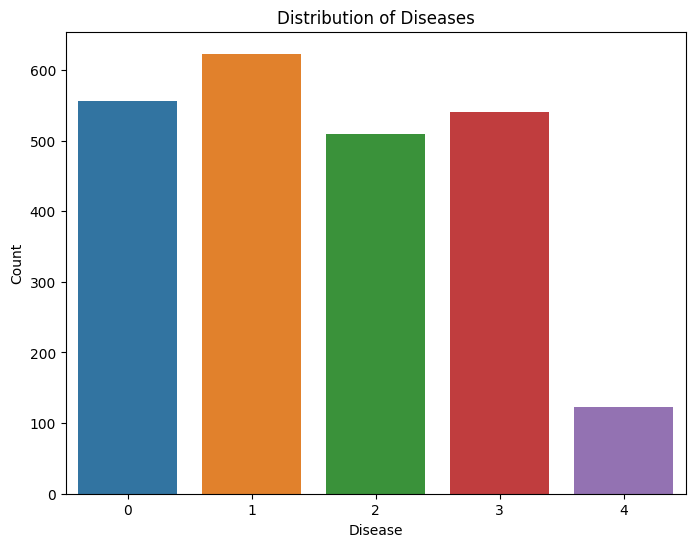

In [22]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Disease', data=train_df)
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

**Splitting dataset into X/Y**

In [23]:
# Split features (X) and target variable (y)
X_train = train_df.drop('Disease', axis=1)
y_train = train_df['Disease']
X_test = test_df.drop('Disease', axis=1)
y_test = test_df['Disease']

In [24]:
y = train_df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [25]:
y

0       0
1       3
2       2
3       1
4       2
       ..
2346    3
2347    2
2348    1
2349    3
2350    1
Name: Disease, Length: 2351, dtype: int64

**Model Building**

Random Forest Classifier

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [27]:
rfc_pred = rfc.predict(X_test)
print(rfc_pred)

[1 0 3 2 0 0 0 1 3 3 3 1 3 3 1 3 0 0 3 1 1 1 0 1 0 0 2 1 3 1 0 2 1 2 0 2 0
 1 1 3 0 3 0 3 1 3 3 3 0 1 2 0 4 1 1 4 1 1 2 0 0 2 0 2 3 3 2 0 3 1 1 1 2 2
 0 0 1 0 1 2 0 2 2 2 1 0 1 2 0 3 1 0 1 3 0 4 2 2 1 1 3 1 4 0 2 3 0 3 3 0 2
 3 0 3 0 2 3 1 1 3 3 0 1 0 1 1 1 2 0 2 2 3 1 0 1 3 1 1 1 2 1 3 3 1 2 0 3 3
 1 3 1 1 0 0 0 1 0 1 1 1 3 2 0 2 3 1 0 0 1 1 1 3 1 3 1 0 2 0 0 4 1 2 1 3 3
 1 1 2 0 3 0 2 3 3 1 0 1 3 2 2 2 0 0 0 3 2 3 0 0 0 1 2 0 2 0 1 0 3 4 1 1 3
 1 1 1 2 2 0 4 1 2 0 2 2 0 1 1 2 2 2 1 2 0 1 1 0 3 1 4 3 2 0 3 0 1 0 3 3 3
 1 3 1 3 3 0 2 3 3 2 1 2 1 0 2 3 1 4 0 1 0 1 0 2 2 3 3 2 1 2 4 3 3 2 1 2 2
 3 3 1 0 4 3 0 3 0 0 1 4 1 1 0 2 1 0 3 2 1 3 2 1 4 2 3 1 3 2 2 1 1 1 3 2 3
 0 3 2 3 2 4 3 1 3 1 0 0 2 2 2 2 2 3 3 0 1 2 0 3 2 0 4 2 3 2 3 0 0 0 4 3 0
 1 3 0 2 1 2 1 2 3 3 1 3 3 1 3 3 3 2 3 0 0 2 3 3 1 4 0 2 2 3 3 1 2 0 0 1 1
 3 3 0 1 0 4 2 2 1 3 3 0 1 1 3 1 3 1 1 2 3 2 0 2 2 1 1 1 3 2 0 1 3 2 0 1 1
 1 1 1 3 1 2 1 1 2 4 3 2 1 2 2 2 3 1 1 0 2 2 3 2 4 1 1 2 2 2 2 2 3 4 3 3 2
 2 3 4 3 1 3 1 0 2 0 3 0 

Decision Tree Classifier

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(dtc_pred)

[1 0 3 2 0 0 0 1 3 3 3 1 3 3 1 3 0 0 3 1 1 1 0 1 0 0 2 1 3 1 0 2 1 2 0 2 0
 1 1 3 0 3 0 3 1 3 3 3 0 1 2 0 4 1 1 4 1 1 2 0 0 2 0 2 3 3 2 0 3 1 1 1 2 2
 0 0 1 0 1 2 0 2 2 2 1 0 1 2 0 3 1 0 1 3 0 4 2 2 1 1 3 1 4 0 2 3 0 3 3 0 2
 3 0 3 0 2 3 1 1 3 3 0 1 0 1 1 1 2 0 2 2 3 1 0 1 3 1 1 1 2 1 3 3 1 2 0 3 3
 1 3 1 1 0 0 0 1 0 1 1 1 3 2 0 2 3 1 0 0 1 1 1 3 1 3 1 0 2 0 0 4 1 2 1 3 3
 1 1 2 0 3 0 2 3 3 1 0 1 3 2 2 2 0 0 0 3 2 3 0 0 0 1 2 0 2 0 1 0 3 4 1 1 3
 1 1 1 2 2 0 4 1 2 0 2 2 0 1 1 2 2 2 1 2 0 1 1 0 3 1 4 3 2 0 3 0 1 0 3 3 3
 1 3 1 3 3 0 2 3 3 2 1 2 1 0 2 3 1 4 0 1 0 1 0 2 2 3 3 2 1 2 4 3 3 2 1 2 2
 3 3 1 0 4 3 0 3 0 0 1 4 1 1 0 2 1 0 3 2 1 3 2 1 4 2 3 1 3 2 2 1 1 1 3 2 3
 0 3 2 3 2 4 3 1 3 1 0 0 2 2 2 2 2 3 3 0 1 2 0 3 2 0 4 2 3 2 3 0 0 0 4 3 0
 1 3 0 2 1 2 1 2 3 3 1 3 3 1 3 3 3 2 3 0 0 2 3 3 1 4 0 2 2 3 3 1 2 0 0 1 1
 3 3 0 1 0 4 2 2 1 3 3 0 1 1 3 1 3 1 1 2 3 2 0 2 2 1 1 1 3 2 0 1 3 2 0 1 1
 1 1 1 3 1 2 1 1 2 4 3 2 1 2 2 2 3 1 1 0 2 2 3 2 4 1 1 2 2 2 2 2 3 4 3 3 2
 2 3 4 3 1 3 1 0 2 0 3 0 

Support Vector Machine (SVM)

In [29]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(svc_pred)

[1 0 3 2 0 0 0 1 3 3 3 1 3 3 1 3 0 0 3 1 1 1 0 1 0 0 2 1 3 1 0 2 1 2 0 2 0
 1 1 3 0 3 0 3 1 3 3 3 0 1 2 0 4 1 1 4 1 1 2 0 0 2 0 2 3 3 2 0 3 1 1 1 2 2
 0 0 1 0 1 2 0 2 2 2 1 0 1 2 0 3 1 0 1 3 0 4 2 2 1 1 3 1 4 0 2 3 0 3 3 0 2
 3 0 3 0 2 3 1 1 3 3 0 1 0 1 1 1 2 0 2 2 3 1 0 1 3 1 1 1 2 1 3 3 1 2 0 3 3
 1 3 1 1 0 0 0 1 0 1 1 1 3 2 0 2 3 1 0 0 1 1 1 3 1 3 1 0 2 0 0 4 1 2 1 3 3
 1 1 2 0 3 0 2 3 3 1 0 1 3 2 2 2 0 0 0 3 2 3 0 0 0 1 2 0 2 0 1 0 3 4 1 1 3
 1 1 1 2 2 0 4 1 2 0 2 2 0 1 1 2 2 2 1 2 0 1 1 0 3 1 4 3 2 0 3 0 1 0 3 3 3
 1 3 1 3 3 0 2 3 3 2 1 2 1 0 2 3 1 4 0 1 0 1 0 2 2 3 3 2 1 2 4 3 3 2 1 2 2
 3 3 1 0 4 3 0 3 0 0 1 4 1 1 0 2 1 0 3 2 1 3 2 1 4 2 3 1 3 2 2 1 1 1 3 2 3
 0 3 2 3 2 4 3 1 3 1 0 0 2 2 2 2 2 3 3 0 1 2 0 3 2 0 4 2 3 2 3 0 0 0 4 3 0
 1 3 0 2 1 2 1 2 3 3 1 3 3 1 3 3 3 2 3 0 0 2 3 3 1 4 0 2 2 3 3 1 2 0 0 1 1
 3 3 0 1 0 4 2 2 1 3 3 0 1 1 3 1 3 1 1 2 3 2 0 2 2 1 1 1 3 2 0 1 3 2 0 1 1
 1 1 1 3 1 2 1 1 2 4 3 2 1 2 2 2 3 1 1 0 2 2 3 2 4 1 1 2 2 2 2 2 3 4 3 3 2
 2 3 4 3 1 3 1 0 2 0 3 0 

**Model Evaluation**

Random Forest Classifier

In [30]:
print(f'Accuracy: {accuracy_score(y_test, rfc_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, rfc_pred)}')

Accuracy: 1.0
Balanced Accuracy: 1.0


In [31]:
# Evaluate the model on the test set
test_preds = rfc.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, test_preds, target_names=['Healthy', 'Anemia', 'Thalasse', 'Diabetes', 'Thromboc']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       124
      Anemia       1.00      1.00      1.00       162
    Thalasse       1.00      1.00      1.00       138
    Diabetes       1.00      1.00      1.00       139
    Thromboc       1.00      1.00      1.00        25

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



Decision Tree Classifier

In [32]:
print(f'Accuracy: {accuracy_score(y_test, dtc_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, dtc_pred)}')

Accuracy: 1.0
Balanced Accuracy: 1.0


In [33]:
test_preds = dtc.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, test_preds, target_names=['Healthy', 'Anemia', 'Thalasse', 'Diabetes', 'Thromboc']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       124
      Anemia       1.00      1.00      1.00       162
    Thalasse       1.00      1.00      1.00       138
    Diabetes       1.00      1.00      1.00       139
    Thromboc       1.00      1.00      1.00        25

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



SVM

In [34]:
print(f'Accuracy: {accuracy_score(y_test, svc_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, svc_pred)}')

Accuracy: 1.0
Balanced Accuracy: 1.0


In [35]:
test_preds = svc.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, test_preds, target_names=['Healthy', 'Anemia', 'Thalasse', 'Diabetes', 'Thromboc']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       124
      Anemia       1.00      1.00      1.00       162
    Thalasse       1.00      1.00      1.00       138
    Diabetes       1.00      1.00      1.00       139
    Thromboc       1.00      1.00      1.00        25

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



**Conclusion**

So, after testing several models, we can see that all are giving accurate performance for  the given dataset. Also their accuracy, precision, recall, f1-score, support, macro avg, weighted avg are same too.